In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import copy




1. Give the right json_file for the wyscout data 
2. Give the right team ids for your data 
3. Give the right team names
4. Choose a name for the saved file, you can also leave it as it is
5. If you like to you can edit the color genertor or you can use the code without it



In [4]:

# Opening json file
f = open('../../data/wyscout/5111384/5111384_events.json', 'r')
data = json.load(f)

In [5]:
team_away_id =  9109  # Austria
team_home_id =  10073  # North Macedonia

team_away_name = 'Austria'
team_home_name = 'North Macedonia'

team_home_formation = np.array([])
team_away_formation = np.array([])
time = np.array([])

filename = f"formations_{team_home_name}_{team_away_name}.png"
filename = filename.replace(" ", "")

In [27]:
for e in data['events']:
    second = e['second']
    minute = e['minute']
    time_in_min = second / 60 +  minute
            
    if e['team']['id'] == team_home_id:
       formation = e['team']['formation'] 
       team_home_formation = np.append(team_home_formation, formation)
       formation = e['opponentTeam']['formation'] 
       team_away_formation = np.append(team_away_formation, formation)
    if e['team']['id'] == team_away_id:
       formation = e['team']['formation'] 
       team_away_formation = np.append(team_away_formation, formation)
       formation = e['opponentTeam']['formation'] 
       team_home_formation = np.append(team_home_formation, formation)
    
    time = np.append(time, time_in_min)        

len(team_home_formation)

11956

In [46]:
def extract(formation, time):
    current_formation = formation[0]
    
    formations = [current_formation]
    durations = []
    last_changed = 0.
    lasted_until = []
    
    for i in range(len(formation[1:])):
        if formation[i] != current_formation :
            formations.append(current_formation)
            durations.append(time[i] - last_changed)
            last_changed = time[i]
            lasted_until.append(last_changed)
            current_formation = formation[i]
            
     
    if current_formation != formations[-1] :
        formations.append(current_formation)
        durations.append(time[-1] - last_changed )
        lasted_until.append(time[-1])
    
    return durations, formations, lasted_until


In [47]:
home_duration_formation, home_labels, home_lasted_until = extract(team_home_formation, time)
away_duration_formation, away_labels, away_lasted_until = extract(team_away_formation, time)

In [51]:

def colorgenerator(home, progress):
    # Home is boolean and progress from 0 to 1
    if home:
        return (progress, progress / 4, progress / 4)
    else:

        return (progress / 4, progress / 4, progress)


Saved plot as:  formations_NorthMacedonia_Austria.png


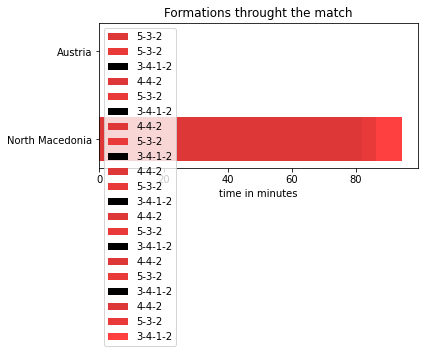

In [52]:
fig, ax = plt.subplots()
labels = [team_home_name, team_away_name]
"""
for i in range(len(home_duration_formation)):
    if i == 0:
        rects = ax.barh(labels, [home_duration_formation[i],0], height=0.5, label=home_labels[i] ) 
    else: 
        rects = ax.barh(labels, [home_duration_formation[i],0], height=0.5, label=home_labels[i], left=[sum(home_duration_formation[0:i]), 0] ) 


for i in range(len(away_duration_formation)):
    if i == 0:
        rects = ax.barh(labels, [0,away_duration_formation[i]], height=0.5, label=away_labels[i] ) 
    else: 
        rects = ax.barh(labels, [0,away_duration_formation[i]], height=0.5, label=away_labels[i], left=[0, sum(away_duration_formation[0:i])] ) 
"""

# With colorgenerator
for i in range(len(home_duration_formation)):
    if i == 0:
        rects = ax.barh(labels, [home_duration_formation[i], 0], height=0.5,
                        label=home_labels[i], color=colorgenerator(True, home_lasted_until[i]/time[-1]))
    else:
        rects = ax.barh(labels, [home_duration_formation[i], 0], height=0.5, label=home_labels[i], left=[
                        sum(home_duration_formation[0:i]), 0], color=colorgenerator(True, home_lasted_until[i]/time[-1]))


for i in range(len(away_duration_formation)):
    if i == 0:
        rects = ax.barh(labels, [0, away_duration_formation[i]], height=0.5,
                        label=away_labels[i], color=colorgenerator(False, away_lasted_until[i]/time[-1]))
    else:
        rects = ax.barh(labels, [0, away_duration_formation[i]], height=0.5, label=away_labels[i], left=[
                        0, sum(away_duration_formation[0:i])], color=colorgenerator(False, away_lasted_until[i]/time[-1]))

ax.legend(loc='best')
ax.set_title('Formations throught the match')
ax.set_xlabel('time in minutes')
plt.tight_layout()
plt.savefig(filename, dpi=200)

print("Saved plot as: ", filename)